# NPV MiniProject - IPL Dataset

1. Importing the necessary libraries and reading the data.

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

2. Drop any columns that you deem unnecessary for analysis.

In [279]:
# Saving the new matches dataset with the dropped values as match
match = matches.drop(
    [
        'city', 'date', 'team1', 'team2', 
        'dl_applied', 'player_of_match', 
              'venue', 'umpire1', 'umpire2', 'umpire3'
    ],
    axis=1
)

In [280]:
# Saving the new deliveries dataset with the dropped values as delivery
delivery = deliveries.drop(
    [
        'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'
    ], 
    axis=1
)

3.	Answer the following questions. Support your answer with appropriate visualizations.

3.a. How many matches we've got in the dataset?

In [281]:
print('Number of matches:', match.id.count())

Number of matches: 636


3.b. How many seasons we've got in the dataset?

Number of seasons: 10


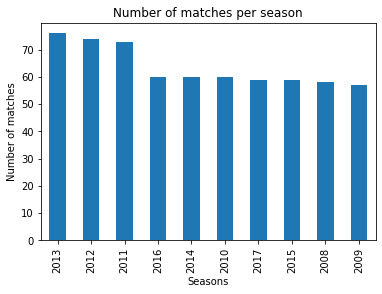

In [40]:
# 2. Number of Seasons
print('Number of seasons:', match['season'].value_counts().count())


match['season'].value_counts().plot(kind='bar', title='Number of matches per season')
plt.xlabel('Seasons')
plt.ylabel('Number of matches')
plt.show()

3.c. Which Team had won by maximum runs?

The Mumbai Indians won by 146 runs


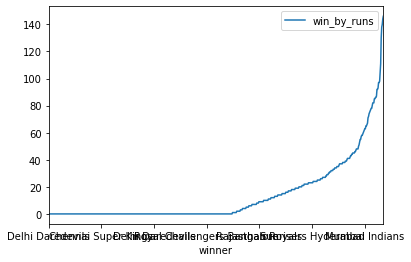

In [295]:
for i in range(len(match)):
    if match['win_by_runs'][i] == match['win_by_runs'].max():
        print('The', match['winner'][i], 'won by', runs_scored, 'runs')

match.sort_values(by='win_by_runs').plot(kind='line',x='winner', y='win_by_runs')
plt.show()

3.d. Which Team had won by maximum wicket?

The Kolkata Knight Riders won by 10 wickets
The Kings XI Punjab won by 10 wickets
The Deccan Chargers won by 10 wickets
The Delhi Daredevils won by 10 wickets
The Royal Challengers Bangalore won by 10 wickets
The Rajasthan Royals won by 10 wickets
The Mumbai Indians won by 10 wickets
The Chennai Super Kings won by 10 wickets
The Royal Challengers Bangalore won by 10 wickets
The Sunrisers Hyderabad won by 10 wickets


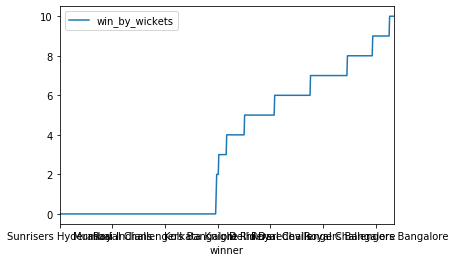

In [293]:
for i in range(len(match)):
    if match['win_by_wickets'][i] == match['win_by_wickets'].max():
        print('The', match['winner'][i], 'won by', wickets, 'wickets')

match.sort_values(by='win_by_wickets').plot(kind='line', y='win_by_wickets', x='winner')
plt.show()

3.e. Which Team had won by closest Margin (minimum runs)?

In [302]:
for i in range(len(match)):
    if match['result'][i] == 'normal':
        if match['win_by_wickets'][i] == 0:
            if match['win_by_runs'][i] == 1:
                    print('The', match['winner'][i], 'won by', match['win_by_runs'][i], 'runs')

The Mumbai Indians won by 1 runs
The Kings XI Punjab won by 1 runs
The Kings XI Punjab won by 1 runs
The Delhi Daredevils won by 1 runs
The Mumbai Indians won by 1 runs
The Chennai Super Kings won by 1 runs
The Gujarat Lions won by 1 runs
The Royal Challengers Bangalore won by 1 runs


3.f. Which Team had won by minimum wicket?

In [298]:
for i in range(len(match)):
    if match['result'][i] == 'normal':
        if match['win_by_runs'][i] == 0:
            if match['win_by_wickets'][i] == 1:
                    print('The', match['winner'][i], 'won by', match['win_by_wickets'][i], 'wickets')

The Kolkata Knight Riders won by 1 wickets


3.g. Which Season had most number of matches?

The 2013 season had the most number of matches. A total of 76 matches.


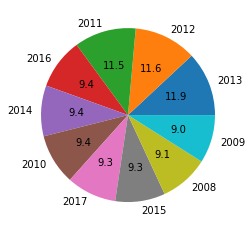

In [244]:
print('The', match['season'].value_counts().idxmax(), 'season had the most number of matches. A total of', match['season'].value_counts().max(), 'matches.')

plt.pie(x = match['season'].value_counts(), labels = match['season'].value_counts().index, autopct='%.1f')
plt.show()

3.h. Which IPL Team is more successful?

The Mumbai Indians had the most number of wins. A total of 92 wins.


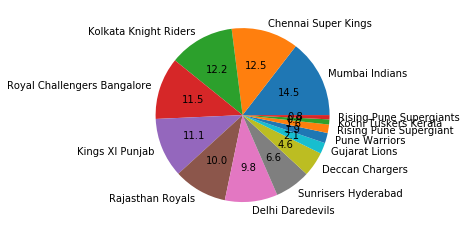

In [299]:
print('The', match['winner'].value_counts().idxmax(), 'had the most number of wins. A total of', match['winner'].value_counts().max(), 'wins.')

plt.pie(x = match['winner'].value_counts(), labels = match['winner'].value_counts().index, autopct='%.1f')
plt.show()

3.i. Has Toss-winning helped in winning matches?

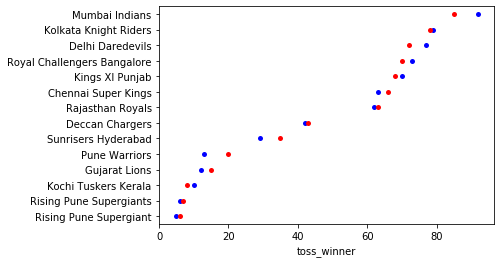

The Toss Winners 

 Mumbai Indians                 85
Kolkata Knight Riders          78
Delhi Daredevils               72
Royal Challengers Bangalore    70
Kings XI Punjab                68
Chennai Super Kings            66
Rajasthan Royals               63
Deccan Chargers                43
Sunrisers Hyderabad            35
Pune Warriors                  20
Gujarat Lions                  15
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64 


The Winners 

 Mumbai Indians                 92
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Rajasthan Royals               63
Delhi Daredevils               62
Sunrisers Hyderabad            42
Deccan Chargers                29
Gujarat Lions                  13
Pune Warriors                  12
Rising Pune Supergiant         10
Kochi Tuskers Kerala            6
Rising Pune 

In [301]:
sns.swarmplot(x=match['winner'].value_counts(), y=match['winner'].value_counts().index, color='blue')
sns.swarmplot(x=match['toss_winner'].value_counts(), y=match['toss_winner'].value_counts().index, color='red')
plt.show()

print('The Toss Winners','\n\n' , match['toss_winner'].value_counts(),'\n\n')
print('The Winners','\n\n' , match['winner'].value_counts(), '\n\n')

print('From the above graph and data  it is evident that there is a clear positive correlation between winning tosses and winning matches')